#Step 1:
**create the required folders**

In [1]:
!mkdir bark_voices

In [2]:
!mkdir bark_voices/speaker

#Step 2:

**If you're cloning a new voice:**

Upload a single .wav file  that you would like to use for cloning, into the **bark_voices/speaker** folder. It should look something like this ⬇

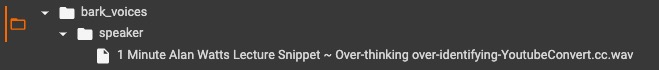



---



---



**If you're loading the weights of a previously cloned voice:**


Upload the .npz file into the **bark_voices/speaker** folder. It should look something like this ⬇

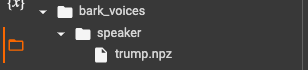

#Step 3:
install TTS and Bark

In [3]:
#install coqui TTS
!pip install TTS -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.8/806.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 101.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:

!git lfs install
!git clone https://huggingface.co/suno/bark

Git LFS initialized.
Cloning into 'bark'...
remote: Enumerating objects: 835, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 835 (delta 5), reused 0 (delta 0), pack-reused 821
Receiving objects: 100% (835/835), 1.55 MiB | 6.75 MiB/s, done.
Resolving deltas: 100% (18/18), done.


#Step 4:


In [ ]:
import torch
from TTS.tts.configs.bark_config import BarkConfig
from TTS.tts.models.bark import Bark
import scipy

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

config = BarkConfig()
model = Bark.init_from_config(config)
model.load_checkpoint(config, checkpoint_dir="bark/", eval=True)
model.to(device)
model.eval()

Enter the text you want to generate ⬇

In [ ]:
text = """
iPhone is a line of smartphones produced by Apple Inc. that use Apple's own iOS mobile operating system.
The first-generation iPhone was announced by then-Apple CEO Steve Jobs on January 9, 2007.
Since then, Apple has annually released new iPhone models and iOS updates. As of November 1, 2018, more than 2.2 billion iPhones had been sold.
"""

In [ ]:
text = f"{text}"
output_dict = model.synthesize(text, config, speaker_id="speaker", voice_dirs="/content/bark_voices/")
sample_rate = 24000
scipy.io.wavfile.write("bark_out.wav", rate=sample_rate, data=output_dict["wav"])

The audio file will be saved as "bark_out.wav". You can find and download it from the files section.

You can listen to the audio directly by running this cell ⬇

In [ ]:
from IPython.display import Audio

audio_file_path = "/content/bark_out.wav"
Audio(audio_file_path)



#How to download and use the weights of the cloned voice

After the cloning is completed, you can find a new file with a **.npz** extension. Download this file. You can use this file to create TTS without needing to clone the same voice again from scratch.

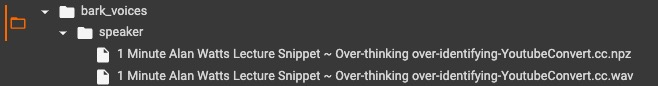

Next time, upload the **.npz** file in bark_voices/speaker. No need to upload .wav file again